# PROBLEM STATEMENT

### 자동차 영업사원입니다. 다음과 같은 피처를 가지고 있는 데이터셋이 있습니다. 어떠한 고객이, 자동차 구매에 얼마를 지불할 것인지를 예측하여, 차를 추천하여 팔려고 합니다. 즉, 자동차 구매 금액을 예측하는 시스템을 만듭니다.

데이터의 컬럼
- Customer Name
- Customer e-mail
- Country
- Gender
- Age
- Annual Salary 
- Credit Card Debt 
- Net Worth 

예측하려는 모델 : 
- Car Purchase Amount 

# STEP #0: LIBRARIES IMPORT


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# STEP #1: IMPORT DATASET

### 'Car_Purchasing_Data.csv' 파일을 encoding='ISO-8859-1' 으로하여 데이터를 읽는다 

In [2]:
car_df = pd.read_csv('Car_Purchasing_Data.csv', encoding='ISO-8859-1')

In [3]:
car_df.head()

,Customer Name,Customer e-mail,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


# STEP #2: VISUALIZE DATASET

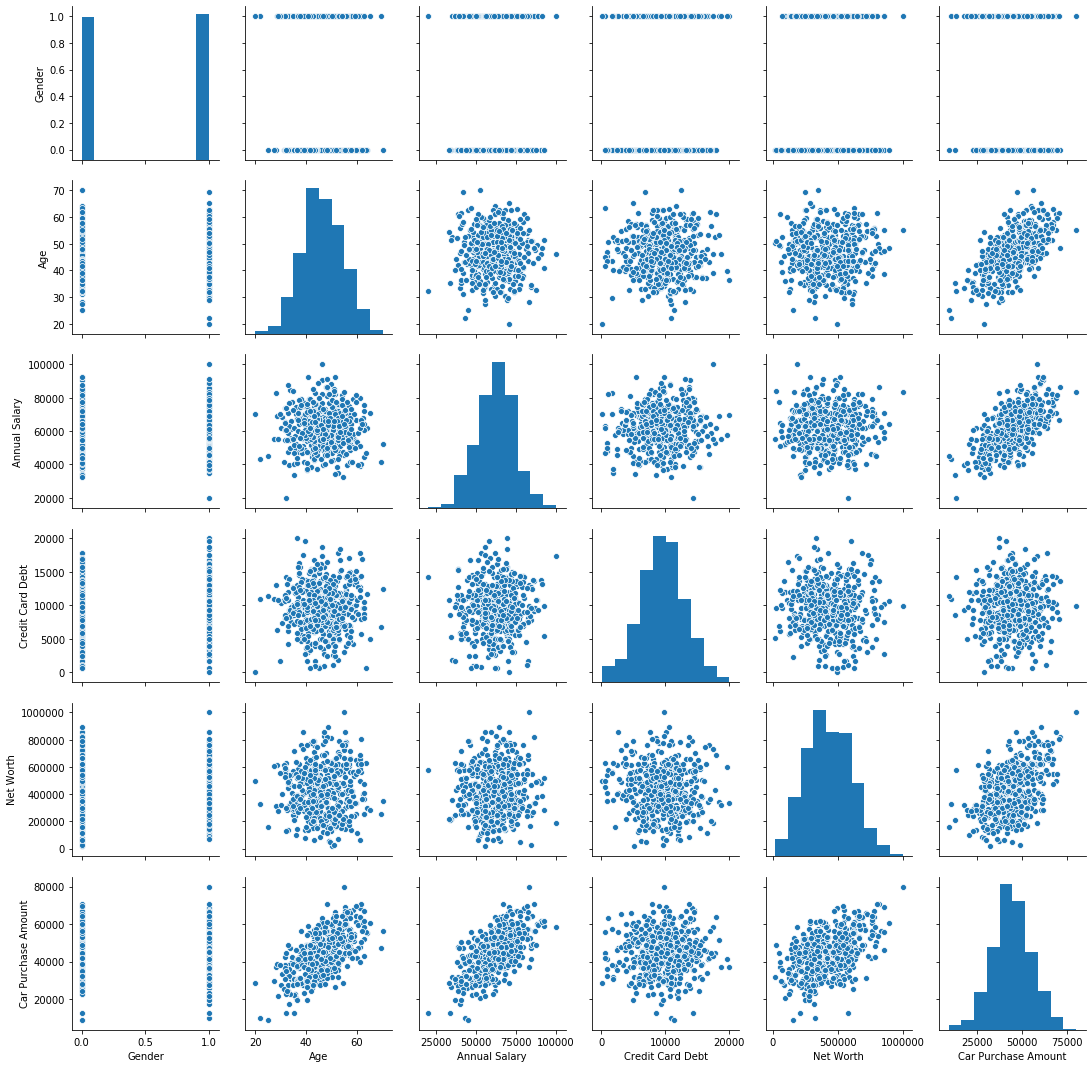

In [4]:
sns.pairplot(car_df)

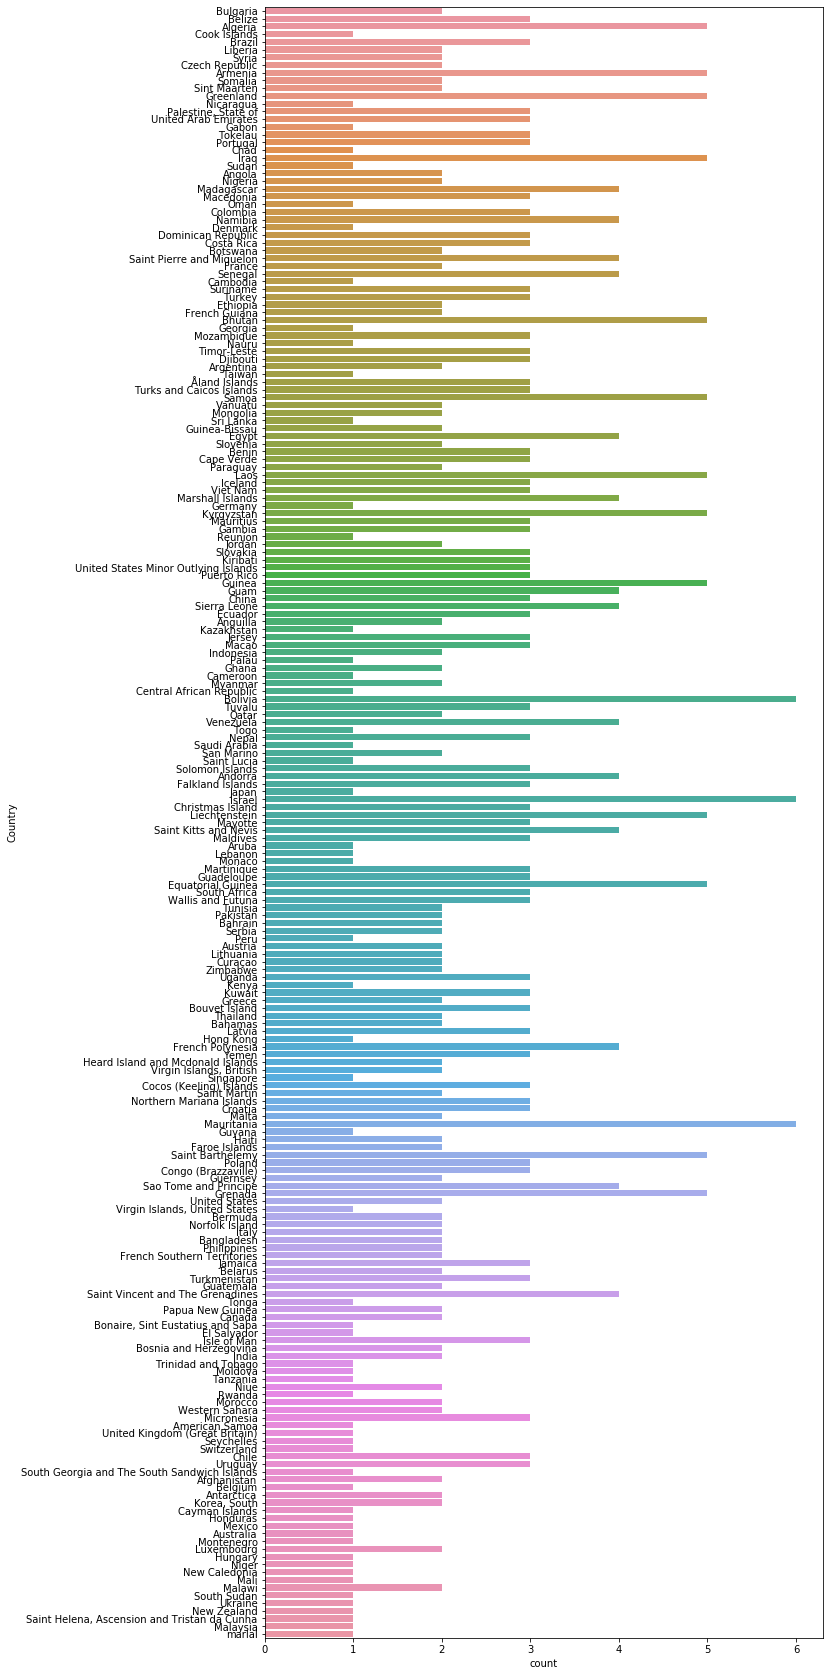

In [6]:
plt.figure(figsize=(10,30))
sns.countplot(data=car_df, y='Country')

# STEP #3: Data Preprocessing 

In [7]:
car_df.head()

,Customer Name,Customer e-mail,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


In [9]:
X = car_df.iloc[: , 3: -2+1 ].values

In [10]:
y = car_df.iloc[:, -1].values

In [11]:
X

array([[0.00000000e+00, 4.18517198e+01, 6.28120930e+04, 1.16093809e+04,
        2.38961250e+05],
       [0.00000000e+00, 4.08706234e+01, 6.66468929e+04, 9.57295714e+03,
        5.30973908e+05],
       [1.00000000e+00, 4.31528975e+01, 5.37985511e+04, 1.11603551e+04,
        6.38467177e+05],
       ...,
       [1.00000000e+00, 5.39434972e+01, 6.88887780e+04, 1.06116069e+04,
        7.64531320e+05],
       [1.00000000e+00, 5.91605086e+01, 4.98119906e+04, 1.40130345e+04,
        3.37826638e+05],
       [1.00000000e+00, 4.67311525e+01, 6.13706777e+04, 9.39134163e+03,
        4.62946492e+05]])

In [12]:
y

array([35321.45877, 45115.52566, 42925.70921, 67422.36313, 55915.46248,
       56611.99784, 28925.70549, 47434.98265, 48013.6141 , 38189.50601,
       59045.51309, 42288.81046, 28700.0334 , 49258.87571, 49510.03356,
       53017.26723, 41814.72067, 43901.71244, 44633.99241, 54827.52403,
       51130.95379, 43402.31525, 47240.86004, 46635.49432, 45078.40193,
       44387.58412, 37161.55393, 49091.97185, 58350.31809, 43994.35972,
       17584.56963, 44650.36073, 66363.89316, 53489.46214, 39810.34817,
       51612.14311, 38978.67458, 10092.22509, 35928.52404, 54823.19221,
       45805.67186, 41567.47033, 28031.20985, 27815.73813, 68678.4352 ,
       68925.09447, 34215.7615 , 37843.46619, 37883.24231, 48734.35708,
       27187.23914, 63738.39065, 48266.75516, 46381.13111, 31978.9799 ,
       48100.29052, 47380.91224, 41425.00116, 38147.81018, 32737.80177,
       37348.13737, 47483.85316, 49730.53339, 40093.61981, 42297.5062 ,
       52954.93121, 48104.11184, 43680.91327, 52707.96816, 49392

In [13]:
X.shape

(500, 5)

In [14]:
y.shape

(500,)

In [16]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 7)

In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
sc = StandardScaler()

In [21]:
X_train = sc.fit_transform(X_train)

In [22]:
X_test = sc.transform(X_test)

In [23]:
y

array([35321.45877, 45115.52566, 42925.70921, 67422.36313, 55915.46248,
       56611.99784, 28925.70549, 47434.98265, 48013.6141 , 38189.50601,
       59045.51309, 42288.81046, 28700.0334 , 49258.87571, 49510.03356,
       53017.26723, 41814.72067, 43901.71244, 44633.99241, 54827.52403,
       51130.95379, 43402.31525, 47240.86004, 46635.49432, 45078.40193,
       44387.58412, 37161.55393, 49091.97185, 58350.31809, 43994.35972,
       17584.56963, 44650.36073, 66363.89316, 53489.46214, 39810.34817,
       51612.14311, 38978.67458, 10092.22509, 35928.52404, 54823.19221,
       45805.67186, 41567.47033, 28031.20985, 27815.73813, 68678.4352 ,
       68925.09447, 34215.7615 , 37843.46619, 37883.24231, 48734.35708,
       27187.23914, 63738.39065, 48266.75516, 46381.13111, 31978.9799 ,
       48100.29052, 47380.91224, 41425.00116, 38147.81018, 32737.80177,
       37348.13737, 47483.85316, 49730.53339, 40093.61981, 42297.5062 ,
       52954.93121, 48104.11184, 43680.91327, 52707.96816, 49392

In [27]:
y_train = y_train.reshape(400,1)

In [29]:
y_test = y_test.reshape(100,1)

In [30]:
sc_y = StandardScaler()

In [31]:
y_train = sc_y.fit_transform(y_train)

In [33]:
y_test = sc_y.transform(y_test)

In [34]:
y_train

array([[ 1.39972236],
       [-0.47983757],
       [ 1.01246676],
       [-1.59717726],
       [ 0.1012948 ],
       [ 2.50629161],
       [ 0.49938202],
       [-1.24245614],
       [-1.31040436],
       [ 0.81678775],
       [ 2.18170996],
       [ 0.03118908],
       [-1.07586782],
       [-0.43614709],
       [-0.608473  ],
       [ 0.01586641],
       [ 0.77782554],
       [-0.53426881],
       [ 0.15146796],
       [-0.31122765],
       [-0.24658439],
       [-1.94180013],
       [-0.11407477],
       [-0.71839524],
       [-0.40426427],
       [-1.36391782],
       [-0.27910151],
       [-0.16050168],
       [ 1.3296625 ],
       [ 0.16757086],
       [ 0.45759976],
       [ 0.48904487],
       [ 1.43612975],
       [-0.25996511],
       [-3.30532474],
       [ 0.52009138],
       [ 1.37570416],
       [-0.4875264 ],
       [ 1.15683211],
       [-0.53037968],
       [ 0.35154292],
       [-0.80149707],
       [-0.01800757],
       [-1.12559162],
       [ 1.63426443],
       [ 0

# STEP#4: TRAINING THE MODEL

### 리그레션이기 때문에, 아웃풋 레이어의 액티베이션 함수는 activation='linear' 으로 한다.

In [35]:
import keras
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [36]:
regressor = Sequential()

In [37]:
X_train.shape

(400, 5)

In [38]:
regressor.add(Dense(input_dim = 5, output_dim=20, activation='relu'))

E:\Anaconda3\envs\ai\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=5, activation="relu", units=20)`
  """Entry point for launching an IPython kernel.


In [39]:
regressor.add(Dense(units=25, activation='relu'))

In [40]:
regressor.add(Dense(units=10, activation='relu'))

In [41]:
regressor.add(Dense(units=1, activation='linear'))

In [42]:
regressor.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 20)                120       
_________________________________________________________________
dense_2 (Dense)              (None, 25)                525       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                260       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 11        
Total params: 916
Trainable params: 916
Non-trainable params: 0
_________________________________________________________________


In [43]:
regressor.compile(optimizer='adam', loss='mean_squared_error')

In [44]:
epochs_history = regressor.fit(X_train, y_train, batch_size=20, epochs=20)




Epoch 1/20





400/400 [==============================] - 0s 1ms/step - loss: 0.7073
Epoch 2/20
400/400 [==============================] - 0s 78us/step - loss: 0.4740
Epoch 3/20
400/400 [==============================] - 0s 45us/step - loss: 0.2930
Epoch 4/20
400/400 [==============================] - 0s 43us/step - loss: 0.1518
Epoch 5/20
400/400 [==============================] - 0s 45us/step - loss: 0.0749
Epoch 6/20
400/400 [==============================] - 0s 40us/step - loss: 0.0408
Epoch 7/20
400/400 [==============================] - 0s 45us/step - loss: 0.0248
Epoch 8/20
400/400 [==============================] - 0s 43us/step - loss: 0.0177
Epoch 9/20
400/400 [==============================] - 0s 55us/step - loss: 0.0136
Epoch 10/20
400/400 [==============================] - 0s 58us/step - loss: 0.0111
Epoch 11/20
400/400 [==============================] - 0s 53us/step - loss: 0.0097
Epoch 12/20
400/400 [==============================] - 0s 60us/step - loss: 0.0089
Epoch 

# STEP#5: EVALUATING THE MODEL 

In [47]:
print(epochs_history.history.keys())

dict_keys(['loss'])


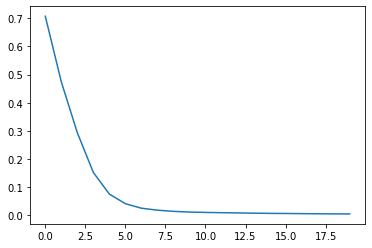

In [48]:
plt.plot(epochs_history.history['loss'])

In [49]:
y_pred = regressor.predict(X_test)

In [50]:
y_pred

array([[-0.11490356],
       [ 0.48617482],
       [-1.3060805 ],
       [ 2.0279768 ],
       [-1.3931264 ],
       [-1.1532054 ],
       [ 0.24321169],
       [ 0.263806  ],
       [-0.5040668 ],
       [ 0.11943547],
       [-0.46130496],
       [ 1.5140471 ],
       [-0.10856327],
       [-1.1836861 ],
       [ 1.9107004 ],
       [ 0.9566331 ],
       [ 0.04560155],
       [-0.5434415 ],
       [-1.1580678 ],
       [ 0.09610311],
       [-1.0631404 ],
       [ 0.6643592 ],
       [ 0.6638229 ],
       [-1.979339  ],
       [ 0.53792584],
       [ 0.9121511 ],
       [-0.16923715],
       [-0.61097324],
       [-0.6044922 ],
       [ 0.2670789 ],
       [-1.9615562 ],
       [ 0.15063876],
       [ 1.8242867 ],
       [-0.11109881],
       [-0.02866721],
       [-1.5369246 ],
       [ 2.1642232 ],
       [-0.02526341],
       [ 1.7732073 ],
       [-1.0132382 ],
       [ 0.16337273],
       [ 1.3293564 ],
       [-1.3719295 ],
       [-0.8168707 ],
       [ 0.3756395 ],
       [ 2

In [51]:
from sklearn.metrics import confusion_matrix

In [52]:
cm = confusion_matrix(y_test, y_pred)

ValueError: continuous is not supported

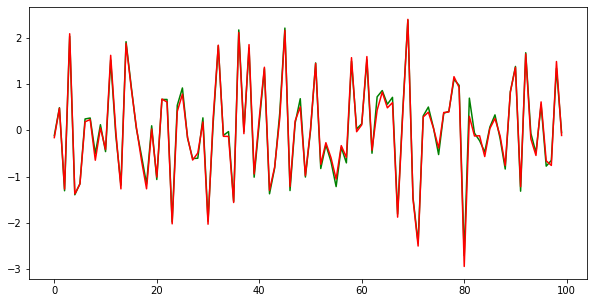

In [60]:
plt.figure(figsize=(10,5))
plt.plot(y_pred, c='g')
plt.plot(y_test, c='r')

# STEP#6: 새로운 데이터를 하나 만들고, 직접 예측 해 본다 

In [61]:
car_df.head()

,Customer Name,Customer e-mail,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


In [62]:
new_data = np.array(  [   
                          [1, 38, 90000, 2000, 500000 ]
                        ]   )

In [63]:
new_data.shape

(1, 5)

In [64]:
new_data = sc.transform(new_data)

In [65]:
new_data

array([[ 1.0100505 , -1.08777888,  2.47674725, -2.14793365,  0.39353681]])

In [66]:
new_pred = regressor.predict(new_data)

In [67]:
new_pred

array([[1.1408045]], dtype=float32)

In [68]:
new_pred_orignal =  sc_y.inverse_transform(new_pred)

In [69]:
new_pred_orignal

array([[56339.48]], dtype=float32)